# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from plotnine import *
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning

In [3]:
# Code Here
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

species = pd.get_dummies(penguins['species'], dtype= float, drop_first= True)
islands = pd.get_dummies(penguins['island'], dtype= float, drop_first= True)
penguins['male'] = pd.get_dummies(penguins['sex'], dtype= float, drop_first= True)
penguins = pd.concat([penguins, species], axis=1)
penguins = pd.concat([penguins, islands], axis=1)
penguins.drop(['species', 'island', 'sex'], axis=1, inplace=True)
penguins = penguins.dropna()
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,male,Chinstrap,Gentoo,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,2007,1.0,0.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,2007,0.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,2007,0.0,0.0,0.0,0.0,1.0
4,36.7,19.3,193.0,3450.0,2007,0.0,0.0,0.0,0.0,1.0
5,39.3,20.6,190.0,3650.0,2007,1.0,0.0,0.0,0.0,1.0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
#MLR Model
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm', 'flipper_length_mm', 'male', 'Chinstrap', 'Gentoo', 'Dream', 'Torgersen']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)
y_pred_lr_train = lr_fit.predict(X_train)

print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_train, y_pred_lr_train))

0.7248143221705127
0.6269232138366168


In [5]:
#KNN model 1
X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("k_regression", KNeighborsRegressor(n_neighbors=5))]
).set_output(transform="pandas")

lr_fitted = lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_fitted.predict(X_test)
y_pred_lr_train = lr_fitted.predict(X_train)

print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_train, y_pred_lr_train))

0.7898604651162785
0.47819062500000037


In [6]:
#KNN model 2

X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("k_regression", KNeighborsRegressor(n_neighbors=50))]
).set_output(transform="pandas")

lr_fitted = lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_fitted.predict(X_test)
y_pred_lr_train = lr_fitted.predict(X_train)

print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_train, y_pred_lr_train))

1.0876759069767439
0.836998046875


In [7]:
#Decision Tree

X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("tree_regression", DecisionTreeRegressor(min_samples_leaf=5))]
).set_output(transform="pandas")

lr_fitted = lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_fitted.predict(X_test)
y_pred_lr_train = lr_fitted.predict(X_train)

print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_train, y_pred_lr_train))

1.1177852011336402
0.3720699094742064


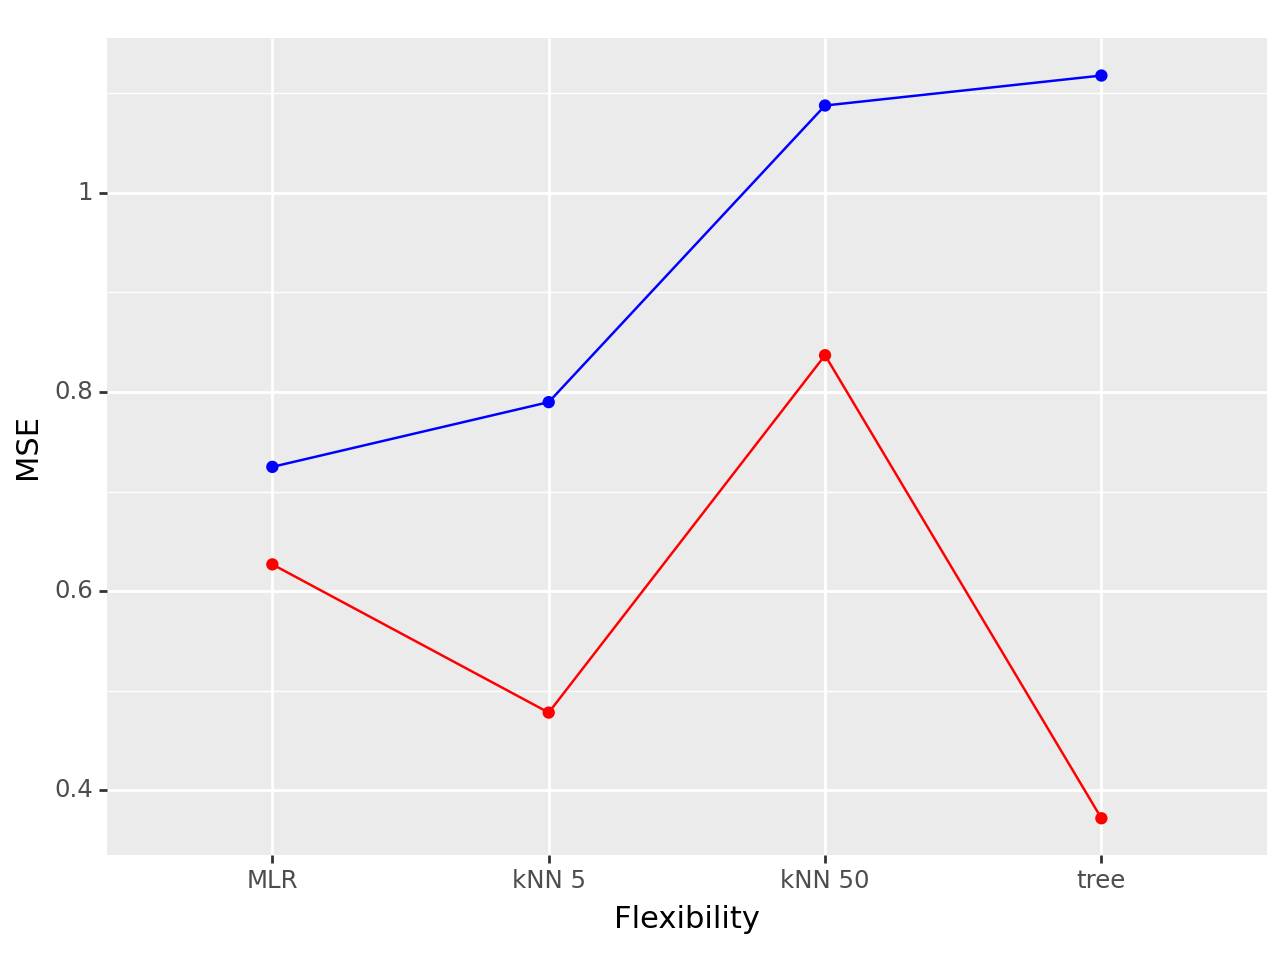

<Figure Size: (640 x 480)>

In [17]:
df = pd.DataFrame({
    "MSE": [0.7248, 0.7898, 1.0876, 1.1177],
    "Flexibility": ['MLR', 'kNN 5', 'kNN 50', 'tree'],
    "MSE_train": [0.6269, 0.4781, 0.8369, 0.3720],
    "Flexibility_train": ['MLR', 'kNN 5', 'kNN 50', 'tree']
})
df['Flexibility'] = pd.Categorical(df['Flexibility'], categories=['MLR', 'kNN 5', 'kNN 50', 'tree'], ordered=True)
df['Flexibility_train'] = pd.Categorical(df['Flexibility_train'], categories=['MLR', 'kNN 5', 'kNN 50', 'tree'], ordered=True)

(ggplot(df, aes(x="Flexibility", y="MSE"))
 + geom_point(color='blue')
 + geom_line(aes(group=1), color='blue')
 + geom_point(aes(x='Flexibility_train', y='MSE_train'), color='red')
 + geom_line(aes(x='Flexibility_train', y='MSE_train', group=1), color='red')
)



The model that performs best on the test data is the MLR model that was created before. However, the DecisionTree model has the best performance on the training data. This makes sense since a decision tree model can be perfectly fit to training data to give it a near 0 MSE.